# Introduction: House Prices: Advanced Regression Techniques

This notebook is to do EDA following the method in [Start Here: A Gentle Introduction](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction)

## Goal
To predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## Data 

### File descriptions
#### train.csv
the training set
#### test.csv
the test set
#### data_description.txt
full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
#### sample_submission.csv
a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms


## Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Imports

We are using a typical data science stack: numpy, pandas, sklearn, matplotlib.

In [34]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data

list the files

In [35]:
#list files 
print(os.listdir("../input/"))

['data_description.txt', 'sample_submission.csv', 'sample_submission.csv.gz', 'test.csv', 'test.csv.gz', 'train.csv', 'train.csv.gz']


In [36]:
# Training data
train = pd.read_csv('../input/train.csv')
print('Training data shape: ',train.shape)
train.head()

Training data shape:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
# Testing data
test = pd.read_csv('../input/test.csv')
print('Training data shape: ',test.shape)
test.head()

Training data shape:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Exploratory Data Analysis

## Examine the Distribution of the Target Column

In [38]:
train['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

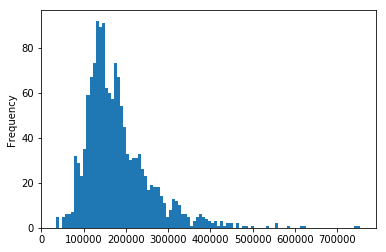

In [39]:
train['SalePrice'].astype(int).plot.hist(bins = 100)

From this information, we see this is an imbalanced class problem. The target data is left skewed.

## Examine Missing Values

check the missing value percentage of each column


In [40]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
# Missing values statistics
missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

## Column Types

Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. .

In [41]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [42]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

Let's now look at the number of unique entries in each of the object (categorical) columns.

In [43]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

## Encoding Categorical Variables

Before we go any further, we need to deal with pesky categorical variables. A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. 

Two ways: 1. Lable encoding.
          2. One Hot encoding.
          
If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option.

Find the columns with different type between train and test

In [44]:
for col in train:
    if col != 'SalePrice' and train[col].dtype != test[col].dtype :
        print(col , 'type doesn\'t match between train and test')
        print('train type is', train[col].dtype)
        print('test type is', test[col].dtype)

BsmtFinSF1 type doesn't match between train and test
train type is int64
test type is float64
BsmtFinSF2 type doesn't match between train and test
train type is int64
test type is float64
BsmtUnfSF type doesn't match between train and test
train type is int64
test type is float64
TotalBsmtSF type doesn't match between train and test
train type is int64
test type is float64
BsmtFullBath type doesn't match between train and test
train type is int64
test type is float64
BsmtHalfBath type doesn't match between train and test
train type is int64
test type is float64
GarageCars type doesn't match between train and test
train type is int64
test type is float64
GarageArea type doesn't match between train and test
train type is int64
test type is float64


use one hot encoder for all the "object type" colunms

In [45]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (1460, 290)
Testing Features shape:  (1459, 271)


## Aligning Training and Testing Data

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

In [47]:
train_labels = train['SalePrice']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

train['SalePrice'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (1460, 272)
Testing Features shape:  (1459, 271)


The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we probably will want to try dimensionality reduction (removing features that are not relevant) to reduce the size of the datasets.

# Back to Exploratory Data Analysis

## Anomalies

Find out outliers. It needs some further effort later.

In [48]:
train['YrSold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [49]:
train['MoSold'].describe()

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

In [53]:
train.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

Id               1460
MSSubClass         15
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [54]:
train.select_dtypes('float').apply(pd.Series.nunique, axis = 0)

LotFrontage    110
MasVnrArea     327
GarageYrBlt     97
dtype: int64

## Correlations

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

In [55]:
correlations = train.corr()['SalePrice'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 GarageYrBlt         0.486362
Foundation_PConc    0.497734
KitchenQual_Ex      0.504094
YearRemodAdd        0.507101
YearBuilt           0.522897
TotRmsAbvGrd        0.533723
BsmtQual_Ex         0.553105
FullBath            0.560664
1stFlrSF            0.605852
TotalBsmtSF         0.613581
GarageArea          0.623431
GarageCars          0.640409
GrLivArea           0.708624
OverallQual         0.790982
SalePrice           1.000000
Name: SalePrice, dtype: float64

Most Negative Correlations:
 ExterQual_TA        -0.589044
KitchenQual_TA      -0.519298
BsmtQual_TA         -0.452394
GarageFinish_Unf    -0.410608
MasVnrType_None     -0.374468
GarageType_Detchd   -0.354141
Foundation_CBlock   -0.343263
HeatingQC_TA        -0.312677
MSZoning_RM         -0.288065
LotShape_Reg        -0.267672
BsmtExposure_No     -0.263600
CentralAir_N        -0.251328
SaleType_WD         -0.242598
RoofStyle_Gable     -0.224744
PavedDrive_N        -0.212630
Name: SalePrice, dtype: 

# Effect of OverallQual: Rates the overall material and finish of the house on Sale Price


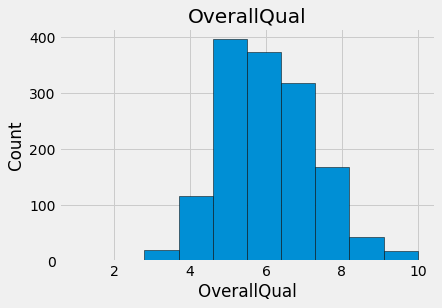

In [65]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train['OverallQual'], edgecolor = 'k', bins = 10)
plt.title('OverallQual'); plt.xlabel('OverallQual'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

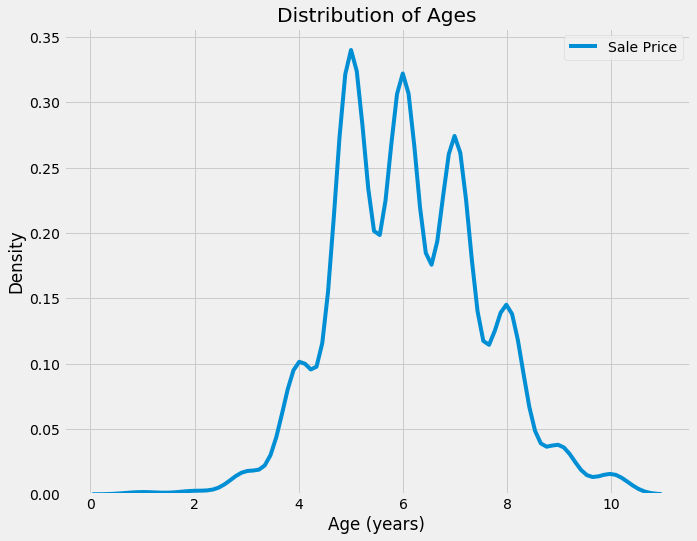

In [68]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train['OverallQual'], label = 'Sale Price')

# KDE plot of loans which were not repaid on time
#sns.kdeplot(train.loc[train['SalePrice'] == 1, 'OverallQual'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); 
plt.ylabel('Density'); 
plt.title('Distribution of Ages');

Check the top 4 most related features

GarageArea          0.623431
GarageCars          0.640409
GrLivArea           0.708624
OverallQual         0.790982

In [70]:
ext_data = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000


heatmap show the correlation

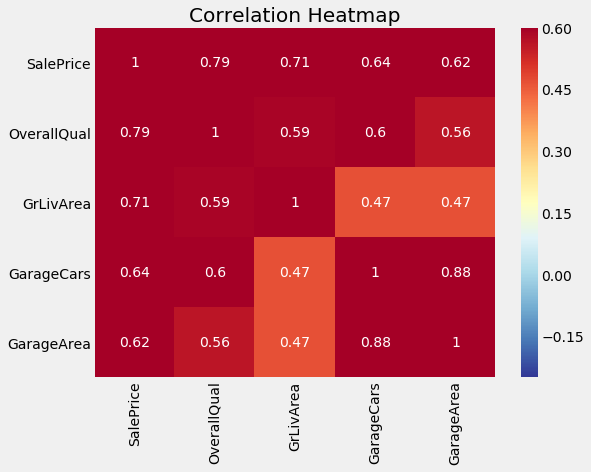

In [71]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

## Feature Engineering

- Polynomial features
- Domain knowledge features

In [73]:
# Make a new dataframe for polynomial features
poly_features = train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','SalePrice']]
poly_features_test = test[[ 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['SalePrice']

poly_features = poly_features.drop(columns = ['SalePrice'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [74]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (1460, 35)


This creates a considerable number of new features. To get the names we have to use the polynomial features get_feature_names method.



In [76]:
poly_transformer.get_feature_names(input_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','SalePrice'])[:15]

['1',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'OverallQual^2',
 'OverallQual GrLivArea',
 'OverallQual GarageCars',
 'OverallQual GarageArea',
 'GrLivArea^2',
 'GrLivArea GarageCars',
 'GrLivArea GarageArea',
 'GarageCars^2',
 'GarageCars GarageArea',
 'GarageArea^2']

There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [78]:
#Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']))

# Add in the target
poly_features['SalePrice'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['SalePrice'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

GrLivArea^3                0.515787
GarageArea^3               0.525205
GarageArea^2               0.606301
GrLivArea^2 GarageArea     0.610801
GarageCars GarageArea^2    0.621691
GarageArea                 0.623431
GarageCars                 0.640409
GrLivArea GarageArea^2     0.641757
GarageCars^3               0.646082
GrLivArea^2                0.652267
Name: SalePrice, dtype: float64
OverallQual^2 GrLivArea             0.843722
OverallQual^2 GarageCars            0.851695
OverallQual GrLivArea GarageCars    0.866489
SalePrice                           1.000000
1                                        NaN
Name: SalePrice, dtype: float64


Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out!

In [80]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']))

# Merge polynomial features into training dataframe
poly_features['Id'] = train['Id']
train_poly = train.merge(poly_features, on = 'Id', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['Id'] = test['Id']
test_poly = test.merge(poly_features_test, on = 'Id', how = 'left')

# Align the dataframes
train_poly, test_poly = train_poly.align(test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', train_poly.shape)
print('Testing data with polynomial features shape:  ', test_poly.shape)

Training data with polynomial features shape:  (1460, 306)
Testing data with polynomial features shape:   (1459, 306)


## Domain Knowledge Features

!!!! wait for more input

In [81]:
train_domain = train.copy()
test_domain = test.copy()

# Baseline

## Logistic Regression Implementation


In [109]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'SalePrice' in train:
    train_l = train.drop(columns = ['SalePrice'])
else:
    train_l = train.copy()
    
# Feature names
features = list(train_l.columns)

# Copy of the testing data
test_l = test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train_l)

# Transform both training and testing data
train_l = imputer.transform(train_l)
test_l = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train_l)
train_l = scaler.transform(train_l)
test_l = scaler.transform(test_l)

print('Training data shape: ', train_l.shape)
print('Testing data shape: ', test_l.shape)

Training data shape:  (1460, 271)
Testing data shape:  (1459, 271)


In [110]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train_l, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [111]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict(test_l)
log_reg_pred.shape

(1459,)

In [99]:
# Submission dataframe
submit = test[['Id']]
submit['SalePrice'] = log_reg_pred
submit.head()

,Id,SalePrice
0,1461,140000
1,1462,140000
2,1463,140000
3,1464,140000
4,1465,140000


In [100]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

In [102]:
submit['SalePrice'].value_counts()

140000    1459
Name: SalePrice, dtype: int64

# Improved Model: Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [114]:
# Train on the training data
random_forest.fit(train_l, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_

feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict(test_l)
predictions.shape

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


(1459,)

In [115]:
# Make a submission dataframe
submit = test[['Id']]
submit['SalePrice'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

In [116]:
submit['SalePrice'].value_counts()

147500    84
175000    66
185000    60
135000    49
140000    44
240000    30
115000    27
112000    26
84500     25
119000    21
125500    20
145000    20
120500    18
230000    18
160000    15
139000    15
129000    15
155000    14
125000    13
290000    13
100000    12
127500    12
147000    12
190000    12
124000    12
215000    11
110000    11
232000    10
130000     9
142125     9
          ..
149000     1
280000     1
150000     1
35311      1
149500     1
236000     1
129500     1
374000     1
109008     1
87500      1
361919     1
139950     1
175500     1
193879     1
377500     1
271000     1
164500     1
207500     1
91500      1
107900     1
122500     1
402861     1
80500      1
185750     1
85400      1
200100     1
209500     1
101800     1
208300     1
34900      1
Name: SalePrice, Length: 345, dtype: int64

# Model Interpretation: Feature Importances

In [105]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

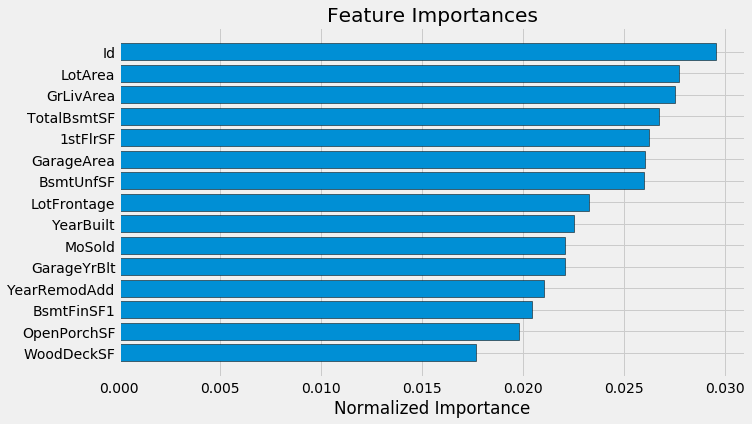

In [119]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

# Just for Fun: Light Gradient Boosting Machine

In [136]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['Id']
    test_ids = test_features['Id']
    
    # Extract the labels for training
    labels = features['SalePrice']
    
    # Remove the ids and target
    features = features.drop(columns = ['Id', 'SalePrice'])
    test_features = test_features.drop(columns = ['Id'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMRegressor(boosting_type='gbdt',num_leaves=31, max_depth=-1, 
                                  learning_rate=0.01, n_estimators=1000, max_bin=255, 
                                  subsample_for_bin=50000, objective=None, min_split_gain=0, 
                                  min_child_weight=3,min_child_samples=10, subsample=1, 
                                  subsample_freq=1, colsample_bytree=1, reg_alpha=0.1, 
                                  reg_lambda=0, seed=17,silent=False, nthread=-1)
        
        # Train the model        
        model.fit(train_features, train_labels, eval_metric='rmse',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'],early_stopping_rounds = 100,
                  categorical_feature = cat_indices, verbose = True)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict(test_features, num_iteration = best_iteration ) / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict(valid_features, num_iteration = best_iteration) #[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['rmse']
        train_score = model.best_score_['train']['rmse']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'Id': test_ids, 'SalePrice': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_mse = mean_squared_error(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_mse)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [137]:
submission, fi, metrics = model(train, test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (1460, 270)
Testing Data Shape:  (1459, 270)
[1]	valid's rmse: 80030.7	train's rmse: 78435.4
Training until validation scores don't improve for 100 rounds.
[2]	valid's rmse: 79397	train's rmse: 77780.3
[3]	valid's rmse: 78771.1	train's rmse: 77132.9
[4]	valid's rmse: 78149.6	train's rmse: 76496.6
[5]	valid's rmse: 77545.6	train's rmse: 75864.1
[6]	valid's rmse: 76948.2	train's rmse: 75238.4
[7]	valid's rmse: 76333.7	train's rmse: 74621.9
[8]	valid's rmse: 75751.2	train's rmse: 74010.5
[9]	valid's rmse: 75182.9	train's rmse: 73405.2
[10]	valid's rmse: 74599.1	train's rmse: 72805.8
[11]	valid's rmse: 74049.3	train's rmse: 72213.7
[12]	valid's rmse: 73475.6	train's rmse: 71627.5
[13]	valid's rmse: 72941.7	train's rmse: 71046
[14]	valid's rmse: 72394.5	train's rmse: 70477.7
[15]	valid's rmse: 71845.2	train's rmse: 69909.9
[16]	valid's rmse: 71323.6	train's rmse: 69349.6
[17]	valid's rmse: 70819.5	train's rmse: 68795
[18]	valid's rmse: 70281.9	train's rmse: 68245.2
[19

[178]	valid's rmse: 31426.3	train's rmse: 25672
[179]	valid's rmse: 31351.7	train's rmse: 25569.6
[180]	valid's rmse: 31296	train's rmse: 25458.3
[181]	valid's rmse: 31206.3	train's rmse: 25358.4
[182]	valid's rmse: 31131.5	train's rmse: 25259.2
[183]	valid's rmse: 31064.6	train's rmse: 25163.8
[184]	valid's rmse: 30998.9	train's rmse: 25066.7
[185]	valid's rmse: 30922.9	train's rmse: 24972.6
[186]	valid's rmse: 30856.8	train's rmse: 24878.1
[187]	valid's rmse: 30780.9	train's rmse: 24786.7
[188]	valid's rmse: 30713.2	train's rmse: 24695.2
[189]	valid's rmse: 30637.3	train's rmse: 24605.9
[190]	valid's rmse: 30556.2	train's rmse: 24497.9
[191]	valid's rmse: 30495.1	train's rmse: 24410.3
[192]	valid's rmse: 30435.9	train's rmse: 24323.6
[193]	valid's rmse: 30367.7	train's rmse: 24217.7
[194]	valid's rmse: 30287.9	train's rmse: 24128.4
[195]	valid's rmse: 30216.4	train's rmse: 24041.7
[196]	valid's rmse: 30142.4	train's rmse: 23955.6
[197]	valid's rmse: 30077.8	train's rmse: 23853.9
[198

[359]	valid's rmse: 25392.4	train's rmse: 15187.1
[360]	valid's rmse: 25366.4	train's rmse: 15155.1
[361]	valid's rmse: 25356.4	train's rmse: 15124.1
[362]	valid's rmse: 25346.1	train's rmse: 15095
[363]	valid's rmse: 25331.1	train's rmse: 15064.7
[364]	valid's rmse: 25316.6	train's rmse: 15035.6
[365]	valid's rmse: 25299.7	train's rmse: 15004.5
[366]	valid's rmse: 25295.3	train's rmse: 14975
[367]	valid's rmse: 25274.3	train's rmse: 14945.9
[368]	valid's rmse: 25263	train's rmse: 14918.3
[369]	valid's rmse: 25249.8	train's rmse: 14889
[370]	valid's rmse: 25237.7	train's rmse: 14860.4
[371]	valid's rmse: 25224.7	train's rmse: 14831.9
[372]	valid's rmse: 25207.4	train's rmse: 14802.1
[373]	valid's rmse: 25193.4	train's rmse: 14775.3
[374]	valid's rmse: 25180.4	train's rmse: 14746.4
[375]	valid's rmse: 25171.3	train's rmse: 14718
[376]	valid's rmse: 25166.1	train's rmse: 14690.5
[377]	valid's rmse: 25146.8	train's rmse: 14663.4
[378]	valid's rmse: 25133.4	train's rmse: 14637.7
[379]	vali

[534]	valid's rmse: 24306.4	train's rmse: 11411.3
[535]	valid's rmse: 24298.9	train's rmse: 11396
[536]	valid's rmse: 24297.9	train's rmse: 11379.6
[537]	valid's rmse: 24296.2	train's rmse: 11360.3
[538]	valid's rmse: 24295.5	train's rmse: 11347.4
[539]	valid's rmse: 24295.3	train's rmse: 11333.3
[540]	valid's rmse: 24297.1	train's rmse: 11320.6
[541]	valid's rmse: 24295.2	train's rmse: 11305.5
[542]	valid's rmse: 24299.6	train's rmse: 11286
[543]	valid's rmse: 24290.6	train's rmse: 11273.3
[544]	valid's rmse: 24287.4	train's rmse: 11258.4
[545]	valid's rmse: 24287.9	train's rmse: 11243.6
[546]	valid's rmse: 24287.3	train's rmse: 11230.4
[547]	valid's rmse: 24282	train's rmse: 11216.1
[548]	valid's rmse: 24279.3	train's rmse: 11202
[549]	valid's rmse: 24278.6	train's rmse: 11189
[550]	valid's rmse: 24279.7	train's rmse: 11175.7
[551]	valid's rmse: 24277.3	train's rmse: 11162.4
[552]	valid's rmse: 24270.4	train's rmse: 11148.2
[553]	valid's rmse: 24274.1	train's rmse: 11129.6
[554]	vali

[714]	valid's rmse: 24053.9	train's rmse: 9303.99
[715]	valid's rmse: 24054.7	train's rmse: 9295.89
[716]	valid's rmse: 24051.9	train's rmse: 9286.38
[717]	valid's rmse: 24051.4	train's rmse: 9278.45
[718]	valid's rmse: 24050.5	train's rmse: 9269.14
[719]	valid's rmse: 24052.7	train's rmse: 9260.78
[720]	valid's rmse: 24057.1	train's rmse: 9247.42
[721]	valid's rmse: 24058.3	train's rmse: 9239.39
[722]	valid's rmse: 24053.3	train's rmse: 9230.94
[723]	valid's rmse: 24051	train's rmse: 9221.45
[724]	valid's rmse: 24058.3	train's rmse: 9207.96
[725]	valid's rmse: 24058.4	train's rmse: 9199.09
[726]	valid's rmse: 24058.2	train's rmse: 9189.92
[727]	valid's rmse: 24057.9	train's rmse: 9182
[728]	valid's rmse: 24056.9	train's rmse: 9173.5
[729]	valid's rmse: 24060.1	train's rmse: 9159.9
[730]	valid's rmse: 24064.2	train's rmse: 9146.87
[731]	valid's rmse: 24063.4	train's rmse: 9137.76
[732]	valid's rmse: 24062.4	train's rmse: 9129.41
[733]	valid's rmse: 24064	train's rmse: 9121.58
[734]	val

[22]	valid's rmse: 67182.6	train's rmse: 66263
[23]	valid's rmse: 66751.1	train's rmse: 65729.1
[24]	valid's rmse: 66322.6	train's rmse: 65201.5
[25]	valid's rmse: 65852	train's rmse: 64676.6
[26]	valid's rmse: 65423.6	train's rmse: 64157.6
[27]	valid's rmse: 64973.7	train's rmse: 63645.4
[28]	valid's rmse: 64503.6	train's rmse: 63138.5
[29]	valid's rmse: 64111.8	train's rmse: 62637.7
[30]	valid's rmse: 63682.8	train's rmse: 62140.9
[31]	valid's rmse: 63238.5	train's rmse: 61649.7
[32]	valid's rmse: 62867	train's rmse: 61166
[33]	valid's rmse: 62426.2	train's rmse: 60685.7
[34]	valid's rmse: 62033.5	train's rmse: 60212.5
[35]	valid's rmse: 61644.7	train's rmse: 59744.1
[36]	valid's rmse: 61239.6	train's rmse: 59277.2
[37]	valid's rmse: 60836.7	train's rmse: 58816.7
[38]	valid's rmse: 60453.3	train's rmse: 58364.2
[39]	valid's rmse: 60121.2	train's rmse: 57914.3
[40]	valid's rmse: 59724.5	train's rmse: 57468.4
[41]	valid's rmse: 59370.5	train's rmse: 57030
[42]	valid's rmse: 58997.4	tra

[197]	valid's rmse: 35838.1	train's rmse: 21633
[198]	valid's rmse: 35803.9	train's rmse: 21532.8
[199]	valid's rmse: 35790.6	train's rmse: 21432.6
[200]	valid's rmse: 35753.8	train's rmse: 21341.8
[201]	valid's rmse: 35736.1	train's rmse: 21250.2
[202]	valid's rmse: 35724.3	train's rmse: 21153.4
[203]	valid's rmse: 35690.7	train's rmse: 21066.1
[204]	valid's rmse: 35683.4	train's rmse: 20975.1
[205]	valid's rmse: 35669.7	train's rmse: 20882.3
[206]	valid's rmse: 35638.1	train's rmse: 20795.2
[207]	valid's rmse: 35632.3	train's rmse: 20707.4
[208]	valid's rmse: 35629	train's rmse: 20615.2
[209]	valid's rmse: 35618.5	train's rmse: 20529.1
[210]	valid's rmse: 35611.9	train's rmse: 20444.3
[211]	valid's rmse: 35585.2	train's rmse: 20361.7
[212]	valid's rmse: 35577.4	train's rmse: 20272.8
[213]	valid's rmse: 35571	train's rmse: 20190.2
[214]	valid's rmse: 35566.6	train's rmse: 20102.2
[215]	valid's rmse: 35542.1	train's rmse: 20023.5
[216]	valid's rmse: 35531.9	train's rmse: 19944.1
[217]	

[366]	valid's rmse: 34622.4	train's rmse: 13208.6
[367]	valid's rmse: 34615.9	train's rmse: 13182
[368]	valid's rmse: 34608.1	train's rmse: 13155.8
[369]	valid's rmse: 34608.2	train's rmse: 13133.1
[370]	valid's rmse: 34607.9	train's rmse: 13107.3
[371]	valid's rmse: 34604.2	train's rmse: 13081.9
[372]	valid's rmse: 34603.1	train's rmse: 13056.6
[373]	valid's rmse: 34607.9	train's rmse: 13029.7
[374]	valid's rmse: 34609.6	train's rmse: 13007.8
[375]	valid's rmse: 34612.7	train's rmse: 12981.3
[376]	valid's rmse: 34617.6	train's rmse: 12955.4
[377]	valid's rmse: 34620.8	train's rmse: 12929.7
[378]	valid's rmse: 34620.4	train's rmse: 12905.9
[379]	valid's rmse: 34622	train's rmse: 12884.9
[380]	valid's rmse: 34625.3	train's rmse: 12859.8
[381]	valid's rmse: 34629.2	train's rmse: 12834.5
[382]	valid's rmse: 34631.3	train's rmse: 12810
[383]	valid's rmse: 34630.3	train's rmse: 12785.7
[384]	valid's rmse: 34628	train's rmse: 12762.4
[385]	valid's rmse: 34627.9	train's rmse: 12738.4
[386]	va

[537]	valid's rmse: 34703.5	train's rmse: 10146.5
[538]	valid's rmse: 34703.2	train's rmse: 10134.1
[539]	valid's rmse: 34704.4	train's rmse: 10122
Early stopping, best iteration is:
[439]	valid's rmse: 34573	train's rmse: 11631.8
[1]	valid's rmse: 74850.7	train's rmse: 79714.3
Training until validation scores don't improve for 100 rounds.
[2]	valid's rmse: 74319.4	train's rmse: 79040
[3]	valid's rmse: 73791.8	train's rmse: 78376.9
[4]	valid's rmse: 73268.4	train's rmse: 77717.2
[5]	valid's rmse: 72752.3	train's rmse: 77068.8
[6]	valid's rmse: 72236.2	train's rmse: 76427.2
[7]	valid's rmse: 71733.1	train's rmse: 75789.1
[8]	valid's rmse: 71227.5	train's rmse: 75161.8
[9]	valid's rmse: 70739.8	train's rmse: 74537.8
[10]	valid's rmse: 70253.1	train's rmse: 73924.6
[11]	valid's rmse: 69768.2	train's rmse: 73314.4
[12]	valid's rmse: 69293.5	train's rmse: 72715
[13]	valid's rmse: 68827	train's rmse: 72117.9
[14]	valid's rmse: 68353.6	train's rmse: 71534.2
[15]	valid's rmse: 67893	train's rm

[178]	valid's rmse: 30590.3	train's rmse: 25641.7
[179]	valid's rmse: 30488.1	train's rmse: 25532.8
[180]	valid's rmse: 30385.5	train's rmse: 25424.7
[181]	valid's rmse: 30290.3	train's rmse: 25319.9
[182]	valid's rmse: 30209.1	train's rmse: 25213.2
[183]	valid's rmse: 30103.7	train's rmse: 25107.5
[184]	valid's rmse: 30004.9	train's rmse: 25003.4
[185]	valid's rmse: 29913	train's rmse: 24903.1
[186]	valid's rmse: 29822.7	train's rmse: 24802.3
[187]	valid's rmse: 29725.1	train's rmse: 24703.2
[188]	valid's rmse: 29629.6	train's rmse: 24602.1
[189]	valid's rmse: 29555	train's rmse: 24501.9
[190]	valid's rmse: 29463.9	train's rmse: 24404.7
[191]	valid's rmse: 29380.7	train's rmse: 24308.9
[192]	valid's rmse: 29312.2	train's rmse: 24211.7
[193]	valid's rmse: 29229.1	train's rmse: 24120.1
[194]	valid's rmse: 29147.2	train's rmse: 24026.3
[195]	valid's rmse: 29067.1	train's rmse: 23936.8
[196]	valid's rmse: 29000.4	train's rmse: 23847.7
[197]	valid's rmse: 28915.5	train's rmse: 23756.8
[198

[350]	valid's rmse: 24461.9	train's rmse: 15658.3
[351]	valid's rmse: 24448.9	train's rmse: 15633.1
[352]	valid's rmse: 24437.1	train's rmse: 15596
[353]	valid's rmse: 24431.9	train's rmse: 15568.4
[354]	valid's rmse: 24431.4	train's rmse: 15540.7
[355]	valid's rmse: 24414.5	train's rmse: 15517.4
[356]	valid's rmse: 24403.9	train's rmse: 15488.7
[357]	valid's rmse: 24397.2	train's rmse: 15460.4
[358]	valid's rmse: 24379.7	train's rmse: 15432
[359]	valid's rmse: 24369.6	train's rmse: 15408.3
[360]	valid's rmse: 24360.2	train's rmse: 15380.9
[361]	valid's rmse: 24354.9	train's rmse: 15353.8
[362]	valid's rmse: 24348.1	train's rmse: 15327.5
[363]	valid's rmse: 24342.6	train's rmse: 15300.3
[364]	valid's rmse: 24325.3	train's rmse: 15272
[365]	valid's rmse: 24310.7	train's rmse: 15249.1
[366]	valid's rmse: 24303.3	train's rmse: 15216.1
[367]	valid's rmse: 24298.4	train's rmse: 15190.3
[368]	valid's rmse: 24288.5	train's rmse: 15164.4
[369]	valid's rmse: 24278.1	train's rmse: 15141.9
[370]	

[516]	valid's rmse: 23628	train's rmse: 11915.4
[517]	valid's rmse: 23624.1	train's rmse: 11899.3
[518]	valid's rmse: 23625.6	train's rmse: 11883.3
[519]	valid's rmse: 23621.1	train's rmse: 11867
[520]	valid's rmse: 23622.1	train's rmse: 11852.2
[521]	valid's rmse: 23622.6	train's rmse: 11837
[522]	valid's rmse: 23616.1	train's rmse: 11821.4
[523]	valid's rmse: 23614.1	train's rmse: 11806
[524]	valid's rmse: 23610.6	train's rmse: 11789.2
[525]	valid's rmse: 23607.4	train's rmse: 11773.5
[526]	valid's rmse: 23604.3	train's rmse: 11757.7
[527]	valid's rmse: 23602.8	train's rmse: 11741.9
[528]	valid's rmse: 23599.7	train's rmse: 11727
[529]	valid's rmse: 23601.3	train's rmse: 11713
[530]	valid's rmse: 23594.8	train's rmse: 11698.3
[531]	valid's rmse: 23594.4	train's rmse: 11683.7
[532]	valid's rmse: 23592.7	train's rmse: 11667.7
[533]	valid's rmse: 23608.3	train's rmse: 11648.9
[534]	valid's rmse: 23601.2	train's rmse: 11632
[535]	valid's rmse: 23616.8	train's rmse: 11613.6
[536]	valid's 

[65]	valid's rmse: 54804.4	train's rmse: 46716.1
[66]	valid's rmse: 54528.9	train's rmse: 46374.9
[67]	valid's rmse: 54292.9	train's rmse: 46043.6
[68]	valid's rmse: 54026.5	train's rmse: 45709.3
[69]	valid's rmse: 53723.6	train's rmse: 45375.2
[70]	valid's rmse: 53469.2	train's rmse: 45049.2
[71]	valid's rmse: 53175.1	train's rmse: 44727.2
[72]	valid's rmse: 52926.8	train's rmse: 44406.5
[73]	valid's rmse: 52681.9	train's rmse: 44089.2
[74]	valid's rmse: 52394.6	train's rmse: 43773.7
[75]	valid's rmse: 52154.6	train's rmse: 43465.5
[76]	valid's rmse: 51897.7	train's rmse: 43158.7
[77]	valid's rmse: 51688.7	train's rmse: 42860.5
[78]	valid's rmse: 51451.6	train's rmse: 42560.1
[79]	valid's rmse: 51180.6	train's rmse: 42261.4
[80]	valid's rmse: 50959	train's rmse: 41970.4
[81]	valid's rmse: 50722.1	train's rmse: 41682.3
[82]	valid's rmse: 50457.7	train's rmse: 41394.7
[83]	valid's rmse: 50235.1	train's rmse: 41110.5
[84]	valid's rmse: 50050.5	train's rmse: 40836.4
[85]	valid's rmse: 498

[238]	valid's rmse: 34160.7	train's rmse: 19179.5
[239]	valid's rmse: 34126.1	train's rmse: 19115
[240]	valid's rmse: 34090.9	train's rmse: 19051.5
[241]	valid's rmse: 34041.9	train's rmse: 18985.5
[242]	valid's rmse: 34000.2	train's rmse: 18924.6
[243]	valid's rmse: 33953.8	train's rmse: 18858.3
[244]	valid's rmse: 33913.7	train's rmse: 18800.7
[245]	valid's rmse: 33873.2	train's rmse: 18742.6
[246]	valid's rmse: 33834.2	train's rmse: 18684.7
[247]	valid's rmse: 33804	train's rmse: 18620.1
[248]	valid's rmse: 33776.1	train's rmse: 18560
[249]	valid's rmse: 33739.3	train's rmse: 18505
[250]	valid's rmse: 33694	train's rmse: 18442.6
[251]	valid's rmse: 33666.2	train's rmse: 18379.7
[252]	valid's rmse: 33660.7	train's rmse: 18318.1
[253]	valid's rmse: 33656.7	train's rmse: 18255.1
[254]	valid's rmse: 33618.5	train's rmse: 18199.6
[255]	valid's rmse: 33592.9	train's rmse: 18140.5
[256]	valid's rmse: 33588.1	train's rmse: 18082
[257]	valid's rmse: 33555.1	train's rmse: 18028.4
[258]	valid'

[405]	valid's rmse: 31120.3	train's rmse: 12554.9
[406]	valid's rmse: 31107.1	train's rmse: 12535.3
[407]	valid's rmse: 31114.3	train's rmse: 12514.2
[408]	valid's rmse: 31099.8	train's rmse: 12492.2
[409]	valid's rmse: 31104.2	train's rmse: 12469.9
[410]	valid's rmse: 31090	train's rmse: 12450.2
[411]	valid's rmse: 31094	train's rmse: 12427.5
[412]	valid's rmse: 31079.9	train's rmse: 12407.5
[413]	valid's rmse: 31077.9	train's rmse: 12387.6
[414]	valid's rmse: 31080.9	train's rmse: 12366.7
[415]	valid's rmse: 31077.5	train's rmse: 12349.3
[416]	valid's rmse: 31059.6	train's rmse: 12330.9
[417]	valid's rmse: 31063.1	train's rmse: 12309.8
[418]	valid's rmse: 31048.5	train's rmse: 12290.4
[419]	valid's rmse: 31051	train's rmse: 12270.4
[420]	valid's rmse: 31049.8	train's rmse: 12250.9
[421]	valid's rmse: 31050.2	train's rmse: 12233.8
[422]	valid's rmse: 31054	train's rmse: 12212.6
[423]	valid's rmse: 31054.9	train's rmse: 12193.8
[424]	valid's rmse: 31040.6	train's rmse: 12175.3
[425]	va

[572]	valid's rmse: 30715.2	train's rmse: 9979.59
[573]	valid's rmse: 30709.8	train's rmse: 9968.73
[574]	valid's rmse: 30711.7	train's rmse: 9956.8
[575]	valid's rmse: 30710.7	train's rmse: 9945.11
[576]	valid's rmse: 30705.7	train's rmse: 9933.63
[577]	valid's rmse: 30707.6	train's rmse: 9921.92
[578]	valid's rmse: 30698.1	train's rmse: 9910.63
[579]	valid's rmse: 30705.6	train's rmse: 9899.54
[580]	valid's rmse: 30700.5	train's rmse: 9888.39
[581]	valid's rmse: 30697.7	train's rmse: 9877.63
[582]	valid's rmse: 30701.4	train's rmse: 9865.65
[583]	valid's rmse: 30690.3	train's rmse: 9852.81
[584]	valid's rmse: 30687.3	train's rmse: 9841.62
[585]	valid's rmse: 30687.1	train's rmse: 9830.47
[586]	valid's rmse: 30690.8	train's rmse: 9818.74
[587]	valid's rmse: 30682.8	train's rmse: 9807.74
[588]	valid's rmse: 30677.9	train's rmse: 9796.38
[589]	valid's rmse: 30678.8	train's rmse: 9784.41
[590]	valid's rmse: 30683.3	train's rmse: 9773.27
[591]	valid's rmse: 30683.7	train's rmse: 9762.32
[

[754]	valid's rmse: 30231.3	train's rmse: 8163.73
[755]	valid's rmse: 30230.7	train's rmse: 8155.63
[756]	valid's rmse: 30235.3	train's rmse: 8147.76
[757]	valid's rmse: 30229.8	train's rmse: 8139.93
[758]	valid's rmse: 30231	train's rmse: 8131.74
[759]	valid's rmse: 30226.3	train's rmse: 8123.69
[760]	valid's rmse: 30228.6	train's rmse: 8116.49
[761]	valid's rmse: 30230	train's rmse: 8108.27
[762]	valid's rmse: 30224.6	train's rmse: 8099.89
[763]	valid's rmse: 30229.2	train's rmse: 8091.76
[764]	valid's rmse: 30230.7	train's rmse: 8083.1
[765]	valid's rmse: 30225.6	train's rmse: 8074.06
[766]	valid's rmse: 30226.6	train's rmse: 8066.09
[767]	valid's rmse: 30220.2	train's rmse: 8059.38
[768]	valid's rmse: 30212.6	train's rmse: 8051.1
[769]	valid's rmse: 30213.4	train's rmse: 8042.96
[770]	valid's rmse: 30213.5	train's rmse: 8034.96
[771]	valid's rmse: 30214.8	train's rmse: 8026.42
[772]	valid's rmse: 30206.8	train's rmse: 8016.19
[773]	valid's rmse: 30202.6	train's rmse: 8007.65
[774]	

[934]	valid's rmse: 29999	train's rmse: 6874.01
[935]	valid's rmse: 29995.5	train's rmse: 6868.38
[936]	valid's rmse: 29998.8	train's rmse: 6862.16
[937]	valid's rmse: 29991.9	train's rmse: 6853.66
[938]	valid's rmse: 29990.1	train's rmse: 6847.91
[939]	valid's rmse: 29988.1	train's rmse: 6841.8
[940]	valid's rmse: 29991.5	train's rmse: 6835.86
[941]	valid's rmse: 29987.7	train's rmse: 6828.22
[942]	valid's rmse: 29990	train's rmse: 6821.18
[943]	valid's rmse: 29992.6	train's rmse: 6816
[944]	valid's rmse: 29987.2	train's rmse: 6810.37
[945]	valid's rmse: 29983.9	train's rmse: 6804.3
[946]	valid's rmse: 29986.5	train's rmse: 6798.14
[947]	valid's rmse: 29984.4	train's rmse: 6792.16
[948]	valid's rmse: 29979.1	train's rmse: 6783.93
[949]	valid's rmse: 29978.7	train's rmse: 6778.8
[950]	valid's rmse: 29980.3	train's rmse: 6772.82
[951]	valid's rmse: 29979.9	train's rmse: 6767.19
[952]	valid's rmse: 29979.6	train's rmse: 6761.22
[953]	valid's rmse: 29982.6	train's rmse: 6755.48
[954]	vali

[114]	valid's rmse: 39187.9	train's rmse: 34940.4
[115]	valid's rmse: 39075.3	train's rmse: 34745.7
[116]	valid's rmse: 38968.7	train's rmse: 34552.5
[117]	valid's rmse: 38836.4	train's rmse: 34353.6
[118]	valid's rmse: 38729.1	train's rmse: 34157
[119]	valid's rmse: 38630.1	train's rmse: 33970.3
[120]	valid's rmse: 38502.4	train's rmse: 33779.8
[121]	valid's rmse: 38378.3	train's rmse: 33589.6
[122]	valid's rmse: 38279.4	train's rmse: 33401.5
[123]	valid's rmse: 38179.9	train's rmse: 33224.9
[124]	valid's rmse: 38068.9	train's rmse: 33041
[125]	valid's rmse: 37965.7	train's rmse: 32870.4
[126]	valid's rmse: 37879.9	train's rmse: 32698.7
[127]	valid's rmse: 37783.8	train's rmse: 32520.7
[128]	valid's rmse: 37673.4	train's rmse: 32352.7
[129]	valid's rmse: 37588	train's rmse: 32187.1
[130]	valid's rmse: 37490.6	train's rmse: 32018.2
[131]	valid's rmse: 37385.9	train's rmse: 31858
[132]	valid's rmse: 37304.5	train's rmse: 31697.4
[133]	valid's rmse: 37230.7	train's rmse: 31532.6
[134]	va

[290]	valid's rmse: 31882.4	train's rmse: 18059.5
[291]	valid's rmse: 31888.1	train's rmse: 18003.5
[292]	valid's rmse: 31882.4	train's rmse: 17959.3
[293]	valid's rmse: 31881.8	train's rmse: 17913
[294]	valid's rmse: 31888.6	train's rmse: 17858.5
[295]	valid's rmse: 31882.3	train's rmse: 17815.5
[296]	valid's rmse: 31889.8	train's rmse: 17780.4
[297]	valid's rmse: 31883.9	train's rmse: 17738.2
[298]	valid's rmse: 31888.1	train's rmse: 17685
[299]	valid's rmse: 31886.3	train's rmse: 17638.1
[300]	valid's rmse: 31889.7	train's rmse: 17604.5
[301]	valid's rmse: 31885.7	train's rmse: 17563.6
[302]	valid's rmse: 31879.1	train's rmse: 17519.8
[303]	valid's rmse: 31874.5	train's rmse: 17479.9
[304]	valid's rmse: 31878.3	train's rmse: 17447.8
[305]	valid's rmse: 31873.2	train's rmse: 17409.3
[306]	valid's rmse: 31864.4	train's rmse: 17362.8
[307]	valid's rmse: 31868.4	train's rmse: 17331.6
[308]	valid's rmse: 31862.8	train's rmse: 17294.2
[309]	valid's rmse: 31860.5	train's rmse: 17252.5
[310

[471]	valid's rmse: 31433.3	train's rmse: 13216.7
[472]	valid's rmse: 31423.7	train's rmse: 13195.9
[473]	valid's rmse: 31431.8	train's rmse: 13177
[474]	valid's rmse: 31421.4	train's rmse: 13158.3
[475]	valid's rmse: 31433.5	train's rmse: 13138.2
[476]	valid's rmse: 31425.5	train's rmse: 13124.1
[477]	valid's rmse: 31423.9	train's rmse: 13108.5
[478]	valid's rmse: 31414.6	train's rmse: 13088.3
[479]	valid's rmse: 31421.5	train's rmse: 13070.6
[480]	valid's rmse: 31410.5	train's rmse: 13053
[481]	valid's rmse: 31420.8	train's rmse: 13032.2
[482]	valid's rmse: 31415.4	train's rmse: 13013.1
[483]	valid's rmse: 31404.6	train's rmse: 12993.9
[484]	valid's rmse: 31415.2	train's rmse: 12975.1
[485]	valid's rmse: 31409.2	train's rmse: 12957.4
[486]	valid's rmse: 31399.8	train's rmse: 12940
[487]	valid's rmse: 31401.6	train's rmse: 12921.5
[488]	valid's rmse: 31393.2	train's rmse: 12902.8
[489]	valid's rmse: 31403.9	train's rmse: 12882.6
[490]	valid's rmse: 31393.3	train's rmse: 12865.7
[491]	

[644]	valid's rmse: 31200.1	train's rmse: 10787.8
[645]	valid's rmse: 31195	train's rmse: 10776.6
[646]	valid's rmse: 31203.3	train's rmse: 10765.9
[647]	valid's rmse: 31196.7	train's rmse: 10756.6
[648]	valid's rmse: 31199.3	train's rmse: 10745.6
[649]	valid's rmse: 31193.2	train's rmse: 10735.5
[650]	valid's rmse: 31187.9	train's rmse: 10724.2
[651]	valid's rmse: 31196.2	train's rmse: 10713.7
[652]	valid's rmse: 31199.6	train's rmse: 10702.2
[653]	valid's rmse: 31191.5	train's rmse: 10692.5
[654]	valid's rmse: 31198.2	train's rmse: 10681.2
[655]	valid's rmse: 31193.7	train's rmse: 10670.9
[656]	valid's rmse: 31185.9	train's rmse: 10661.3
[657]	valid's rmse: 31190.4	train's rmse: 10651.4
[658]	valid's rmse: 31182.7	train's rmse: 10641.9
[659]	valid's rmse: 31191	train's rmse: 10631.5
[660]	valid's rmse: 31184.7	train's rmse: 10620.4
[661]	valid's rmse: 31189	train's rmse: 10609.6
[662]	valid's rmse: 31183	train's rmse: 10599.9
[663]	valid's rmse: 31191.1	train's rmse: 10589.8
[664]	va

[822]	valid's rmse: 31017.1	train's rmse: 9201.85
[823]	valid's rmse: 31013.1	train's rmse: 9193.87
[824]	valid's rmse: 31007.4	train's rmse: 9186.61
[825]	valid's rmse: 31012.7	train's rmse: 9179.82
[826]	valid's rmse: 31019.9	train's rmse: 9172.27
[827]	valid's rmse: 31012.4	train's rmse: 9161.76
[828]	valid's rmse: 31008.4	train's rmse: 9154.19
[829]	valid's rmse: 31001	train's rmse: 9147.06
[830]	valid's rmse: 31001.4	train's rmse: 9139.7
[831]	valid's rmse: 30996.6	train's rmse: 9131.27
[832]	valid's rmse: 31006.2	train's rmse: 9123.68
[833]	valid's rmse: 31000.4	train's rmse: 9116.45
[834]	valid's rmse: 31004.1	train's rmse: 9108.58
[835]	valid's rmse: 30999.2	train's rmse: 9101.16
[836]	valid's rmse: 30994	train's rmse: 9092.9
[837]	valid's rmse: 31004.1	train's rmse: 9085.53
[838]	valid's rmse: 30998.1	train's rmse: 9078.3
[839]	valid's rmse: 30997.6	train's rmse: 9070.01
[840]	valid's rmse: 30997.5	train's rmse: 9063.07
[841]	valid's rmse: 30993.2	train's rmse: 9056.26
[842]	v

[988]	valid's rmse: 30796.8	train's rmse: 8044.88
[989]	valid's rmse: 30791.4	train's rmse: 8037.43
[990]	valid's rmse: 30786.2	train's rmse: 8031.11
[991]	valid's rmse: 30778.1	train's rmse: 8022.96
[992]	valid's rmse: 30774.9	train's rmse: 8016.58
[993]	valid's rmse: 30778.6	train's rmse: 8010.47
[994]	valid's rmse: 30775.8	train's rmse: 8004.46
[995]	valid's rmse: 30771.7	train's rmse: 7998.76
[996]	valid's rmse: 30766.6	train's rmse: 7992.85
[997]	valid's rmse: 30764.2	train's rmse: 7986.78
[998]	valid's rmse: 30759.5	train's rmse: 7980.23
[999]	valid's rmse: 30762.9	train's rmse: 7974.17
[1000]	valid's rmse: 30754.8	train's rmse: 7966.63
Did not meet early stopping. Best iteration is:
[1000]	valid's rmse: 30754.8	train's rmse: 7966.63
Baseline metrics
      fold         train         valid
0        0   8858.024856  2.404670e+04
1        1  11631.837375  3.457303e+04
2        2  11667.736445  2.359268e+04
3        3   6476.989954  2.992150e+04
4        4   7966.630361  3.075476e+04

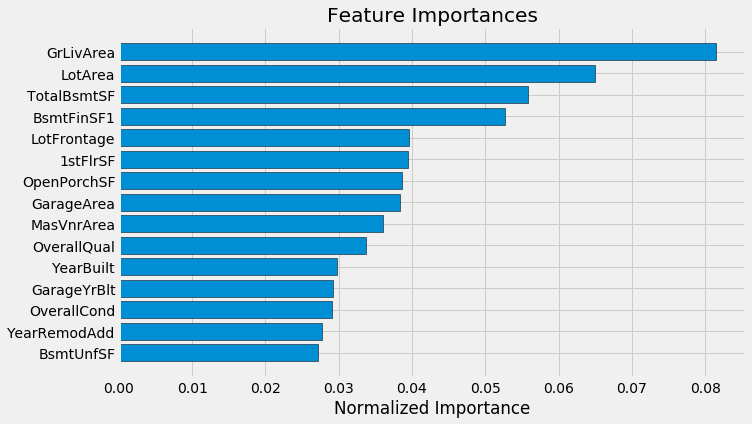

In [138]:
fi_sorted = plot_feature_importances(fi)

In [139]:
submission.to_csv('baseline_lgb.csv', index = False)